<a href="https://colab.research.google.com/github/deepak26911/Deep-learning/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


In [10]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

In [12]:
X.shape

(100, 2)

<Axes: >

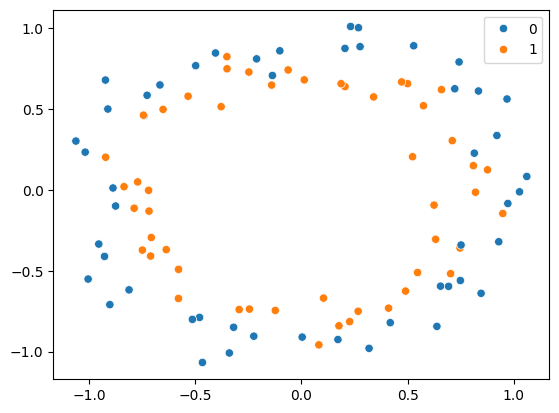

In [14]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=400)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4820 - loss: 0.6940 - val_accuracy: 0.4500 - val_loss: 0.6980
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4844 - loss: 0.6907 - val_accuracy: 0.4500 - val_loss: 0.6995
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5477 - loss: 0.6852 - val_accuracy: 0.4500 - val_loss: 0.7027
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5023 - loss: 0.6894 - val_accuracy: 0.4500 - val_loss: 0.7043
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5219 - loss: 0.6833 - val_accuracy: 0.4500 - val_loss: 0.7058
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4867 - loss: 0.6883 - val_accuracy: 0.4500 - val_loss: 0.7070
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5633 - loss: 0.6766 - val_accuracy: 0.4500 - val_loss: 0.7085
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4875 - loss: 0.6882 - val_accuracy: 0.4000 - val_loss

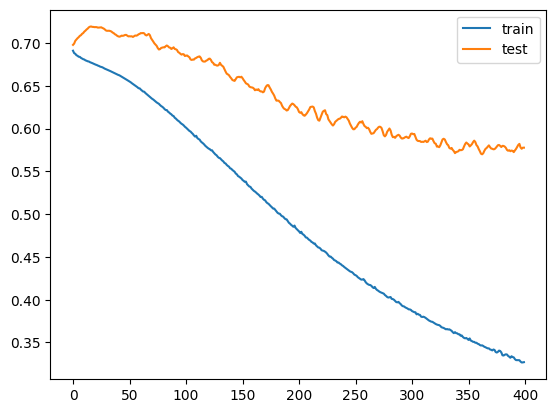

In [21]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

#Early_Stopping

In [30]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
callback=EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [33]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.4578 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4820 - loss: 0.6949 - val_accuracy: 0.4500 - val_loss: 0.6942
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5063 - loss: 0.6933 - val_accuracy: 0.3500 - val_loss: 0.6976
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5258 - loss: 0.6907 - val_accuracy: 0.3500 - val_loss: 0.7002
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4773 - loss: 0.6925 - val_accuracy: 0.4000 - val_loss: 0.7026
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5148 - loss: 0.6892 - val_accuracy: 0.3500 - val_loss: 0.7052
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5539 - loss: 0.6868 - val_accuracy: 0.3500 - val_loss: 0.7082
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5484 - loss: 0.6870 - val_accuracy: 0.4000 - 

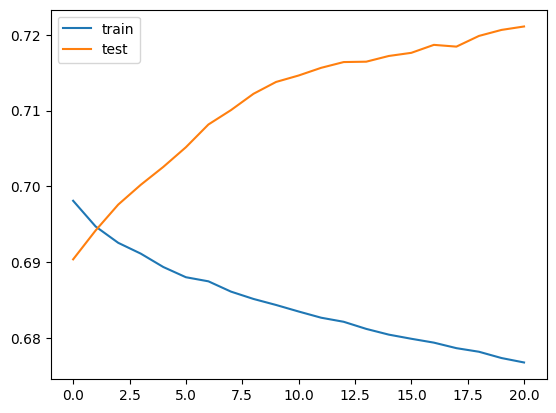

In [34]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()